# 프로젝트 1. 선형회귀 설계하여 당뇨병 수치 맞춰보자

## (1) 데이터 가져오기

In [1]:
# 모듈, 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.datasets as sd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# 데이터셋 살펴보기
diabetes = sd.load_diabetes()

# diabetes 타입
print(type(diabetes))
# diabetes 안에 담긴 정보 확인하기
print(diabetes.keys())
# 데이터를 따로 변수에 저장
db_data = diabetes.data
# db_data 형상정보 출력
print(db_data.shape)
# 샘플 확인
print(db_data[0])

# label
db_label = diabetes.target
print(db_label.shape)
print(diabetes.feature_names)

print(diabetes.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp

In [3]:
# df_X, df_y = sd.load_diabetes(return_X_y=True)
df_X, df_y = diabetes.data, diabetes.target

print(df_X.shape)
print(df_y.shape)
print(type(df_y))

(442, 10)
(442,)
<class 'numpy.ndarray'>


## (2) 모델에 입력할 데이터 `X` 준비하기

In [4]:
X=df_X
y=pd.DataFrame(df_y).to_numpy() 
print(y.shape)

y=df_y
print(y.shape)

(442, 1)
(442,)


In [5]:
type(X)

numpy.ndarray

## (3) 모델에 예측할 데이터 `y` 준비하기

In [6]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(442,)


## (4) train, test 떼이터로 분리하기

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 **`W`**와 **`b`**를 준비해주세요.
- 모델 함수를 구현해주세요.

In [8]:
W = np.random.rand(10)
b = np.random.rand()
print(W, b)

[0.4410394  0.59656991 0.25089569 0.53688709 0.71078394 0.62682002
 0.61709954 0.86290071 0.68871667 0.80669738] 0.47767685082568045


In [9]:
W

array([0.4410394 , 0.59656991, 0.25089569, 0.53688709, 0.71078394,
       0.62682002, 0.61709954, 0.86290071, 0.68871667, 0.80669738])

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [11]:
len(model(X,W,1))

442

## (6) 손실함수 `loss` 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [12]:
def MSE(a, b):
    mse = ((a-b) ** 2).mean()
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [14]:
loss(X,W,b,y)

28917.830484726073

## (7) 기울기를 구하는 `gradient` 함수 구현하기

In [15]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [16]:
print(X.shape)
print(y.shape)
#error=model(X,W,b)-y
#error.shape
#y_train.value

(442, 10)
(442,)


In [17]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
print(type(dW))

dW: [ -60.50603963  -13.69047301 -189.54901276 -142.56544139  -68.10711602
  -55.85433916  127.61919909 -138.87691937 -182.73799154 -123.38538772]
db: -303.31161462414053
<class 'numpy.ndarray'>


## (8) 하이퍼 파라미터인 학습률 설정하기

In [18]:
LEARNING_RATE = 0.0001

In [19]:
print(type(dW))
print(dW)

<class 'numpy.ndarray'>
[ -60.50603963  -13.69047301 -189.54901276 -142.56544139  -68.10711602
  -55.85433916  127.61919909 -138.87691937 -182.73799154 -123.38538772]


## (9) 모델 학습하기

In [20]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration # %d : Loss %0.4f' % (i, L))

Iteration # 10 : Loss 28821.9869
Iteration # 20 : Loss 28726.5205
Iteration # 30 : Loss 28631.4299
Iteration # 40 : Loss 28536.7134
Iteration # 50 : Loss 28442.3697
Iteration # 60 : Loss 28348.3972
Iteration # 70 : Loss 28254.7945
Iteration # 80 : Loss 28161.5600
Iteration # 90 : Loss 28068.6924
Iteration # 100 : Loss 27976.1901
Iteration # 110 : Loss 27884.0517
Iteration # 120 : Loss 27792.2758
Iteration # 130 : Loss 27700.8608
Iteration # 140 : Loss 27609.8055
Iteration # 150 : Loss 27519.1082
Iteration # 160 : Loss 27428.7677
Iteration # 170 : Loss 27338.7825
Iteration # 180 : Loss 27249.1511
Iteration # 190 : Loss 27159.8722
Iteration # 200 : Loss 27070.9443
Iteration # 210 : Loss 26982.3661
Iteration # 220 : Loss 26894.1361
Iteration # 230 : Loss 26806.2531
Iteration # 240 : Loss 26718.7155
Iteration # 250 : Loss 26631.5220
Iteration # 260 : Loss 26544.6713
Iteration # 270 : Loss 26458.1620
Iteration # 280 : Loss 26371.9926
Iteration # 290 : Loss 26286.1620
Iteration # 300 : Loss 

Iteration # 3700 : Loss 10153.2922
Iteration # 3710 : Loss 10130.5634
Iteration # 3720 : Loss 10107.9210
Iteration # 3730 : Loss 10085.3648
Iteration # 3740 : Loss 10062.8944
Iteration # 3750 : Loss 10040.5094
Iteration # 3760 : Loss 10018.2096
Iteration # 3770 : Loss 9995.9945
Iteration # 3780 : Loss 9973.8638
Iteration # 3790 : Loss 9951.8173
Iteration # 3800 : Loss 9929.8545
Iteration # 3810 : Loss 9907.9752
Iteration # 3820 : Loss 9886.1790
Iteration # 3830 : Loss 9864.4656
Iteration # 3840 : Loss 9842.8347
Iteration # 3850 : Loss 9821.2859
Iteration # 3860 : Loss 9799.8189
Iteration # 3870 : Loss 9778.4333
Iteration # 3880 : Loss 9757.1290
Iteration # 3890 : Loss 9735.9055
Iteration # 3900 : Loss 9714.7625
Iteration # 3910 : Loss 9693.6997
Iteration # 3920 : Loss 9672.7168
Iteration # 3930 : Loss 9651.8135
Iteration # 3940 : Loss 9630.9894
Iteration # 3950 : Loss 9610.2443
Iteration # 3960 : Loss 9589.5778
Iteration # 3970 : Loss 9568.9896
Iteration # 3980 : Loss 9548.4795
Iterati

Iteration # 6370 : Loss 6314.8021
Iteration # 6380 : Loss 6306.3696
Iteration # 6390 : Loss 6297.9674
Iteration # 6400 : Loss 6289.5952
Iteration # 6410 : Loss 6281.2530
Iteration # 6420 : Loss 6272.9407
Iteration # 6430 : Loss 6264.6581
Iteration # 6440 : Loss 6256.4051
Iteration # 6450 : Loss 6248.1817
Iteration # 6460 : Loss 6239.9876
Iteration # 6470 : Loss 6231.8229
Iteration # 6480 : Loss 6223.6873
Iteration # 6490 : Loss 6215.5808
Iteration # 6500 : Loss 6207.5032
Iteration # 6510 : Loss 6199.4544
Iteration # 6520 : Loss 6191.4344
Iteration # 6530 : Loss 6183.4430
Iteration # 6540 : Loss 6175.4800
Iteration # 6550 : Loss 6167.5455
Iteration # 6560 : Loss 6159.6392
Iteration # 6570 : Loss 6151.7611
Iteration # 6580 : Loss 6143.9111
Iteration # 6590 : Loss 6136.0890
Iteration # 6600 : Loss 6128.2947
Iteration # 6610 : Loss 6120.5282
Iteration # 6620 : Loss 6112.7893
Iteration # 6630 : Loss 6105.0779
Iteration # 6640 : Loss 6097.3939
Iteration # 6650 : Loss 6089.7372
Iteration # 66

Iteration # 8970 : Loss 4870.5575
Iteration # 8980 : Loss 4867.0836
Iteration # 8990 : Loss 4863.6208
Iteration # 9000 : Loss 4860.1690
Iteration # 9010 : Loss 4856.7282
Iteration # 9020 : Loss 4853.2984
Iteration # 9030 : Loss 4849.8796
Iteration # 9040 : Loss 4846.4716
Iteration # 9050 : Loss 4843.0744
Iteration # 9060 : Loss 4839.6881
Iteration # 9070 : Loss 4836.3125
Iteration # 9080 : Loss 4832.9476
Iteration # 9090 : Loss 4829.5934
Iteration # 9100 : Loss 4826.2498
Iteration # 9110 : Loss 4822.9169
Iteration # 9120 : Loss 4819.5945
Iteration # 9130 : Loss 4816.2826
Iteration # 9140 : Loss 4812.9812
Iteration # 9150 : Loss 4809.6902
Iteration # 9160 : Loss 4806.4096
Iteration # 9170 : Loss 4803.1394
Iteration # 9180 : Loss 4799.8795
Iteration # 9190 : Loss 4796.6299
Iteration # 9200 : Loss 4793.3905
Iteration # 9210 : Loss 4790.1614
Iteration # 9220 : Loss 4786.9424
Iteration # 9230 : Loss 4783.7335
Iteration # 9240 : Loss 4780.5347
Iteration # 9250 : Loss 4777.3460
Iteration # 92

Iteration # 11370 : Loss 4278.1198
Iteration # 11380 : Loss 4276.4064
Iteration # 11390 : Loss 4274.6976
Iteration # 11400 : Loss 4272.9933
Iteration # 11410 : Loss 4271.2936
Iteration # 11420 : Loss 4269.5984
Iteration # 11430 : Loss 4267.9076
Iteration # 11440 : Loss 4266.2214
Iteration # 11450 : Loss 4264.5396
Iteration # 11460 : Loss 4262.8623
Iteration # 11470 : Loss 4261.1894
Iteration # 11480 : Loss 4259.5210
Iteration # 11490 : Loss 4257.8569
Iteration # 11500 : Loss 4256.1972
Iteration # 11510 : Loss 4254.5419
Iteration # 11520 : Loss 4252.8910
Iteration # 11530 : Loss 4251.2444
Iteration # 11540 : Loss 4249.6021
Iteration # 11550 : Loss 4247.9641
Iteration # 11560 : Loss 4246.3305
Iteration # 11570 : Loss 4244.7011
Iteration # 11580 : Loss 4243.0760
Iteration # 11590 : Loss 4241.4551
Iteration # 11600 : Loss 4239.8385
Iteration # 11610 : Loss 4238.2260
Iteration # 11620 : Loss 4236.6178
Iteration # 11630 : Loss 4235.0138
Iteration # 11640 : Loss 4233.4140
Iteration # 11650 : 

Iteration # 15060 : Loss 3857.1405
Iteration # 15070 : Loss 3856.3824
Iteration # 15080 : Loss 3855.6256
Iteration # 15090 : Loss 3854.8702
Iteration # 15100 : Loss 3854.1161
Iteration # 15110 : Loss 3853.3634
Iteration # 15120 : Loss 3852.6119
Iteration # 15130 : Loss 3851.8618
Iteration # 15140 : Loss 3851.1130
Iteration # 15150 : Loss 3850.3655
Iteration # 15160 : Loss 3849.6193
Iteration # 15170 : Loss 3848.8744
Iteration # 15180 : Loss 3848.1308
Iteration # 15190 : Loss 3847.3885
Iteration # 15200 : Loss 3846.6475
Iteration # 15210 : Loss 3845.9078
Iteration # 15220 : Loss 3845.1693
Iteration # 15230 : Loss 3844.4322
Iteration # 15240 : Loss 3843.6963
Iteration # 15250 : Loss 3842.9617
Iteration # 15260 : Loss 3842.2283
Iteration # 15270 : Loss 3841.4963
Iteration # 15280 : Loss 3840.7654
Iteration # 15290 : Loss 3840.0359
Iteration # 15300 : Loss 3839.3076
Iteration # 15310 : Loss 3838.5805
Iteration # 15320 : Loss 3837.8547
Iteration # 15330 : Loss 3837.1301
Iteration # 15340 : 

Iteration # 17480 : Loss 3705.0543
Iteration # 17490 : Loss 3704.5305
Iteration # 17500 : Loss 3704.0075
Iteration # 17510 : Loss 3703.4851
Iteration # 17520 : Loss 3702.9634
Iteration # 17530 : Loss 3702.4424
Iteration # 17540 : Loss 3701.9221
Iteration # 17550 : Loss 3701.4025
Iteration # 17560 : Loss 3700.8835
Iteration # 17570 : Loss 3700.3652
Iteration # 17580 : Loss 3699.8476
Iteration # 17590 : Loss 3699.3307
Iteration # 17600 : Loss 3698.8145
Iteration # 17610 : Loss 3698.2989
Iteration # 17620 : Loss 3697.7839
Iteration # 17630 : Loss 3697.2697
Iteration # 17640 : Loss 3696.7561
Iteration # 17650 : Loss 3696.2432
Iteration # 17660 : Loss 3695.7309
Iteration # 17670 : Loss 3695.2193
Iteration # 17680 : Loss 3694.7084
Iteration # 17690 : Loss 3694.1981
Iteration # 17700 : Loss 3693.6885
Iteration # 17710 : Loss 3693.1795
Iteration # 17720 : Loss 3692.6712
Iteration # 17730 : Loss 3692.1635
Iteration # 17740 : Loss 3691.6565
Iteration # 17750 : Loss 3691.1501
Iteration # 17760 : 

Iteration # 19950 : Loss 3593.1260
Iteration # 19960 : Loss 3592.7323
Iteration # 19970 : Loss 3592.3389
Iteration # 19980 : Loss 3591.9459
Iteration # 19990 : Loss 3591.5534
Iteration # 20000 : Loss 3591.1612


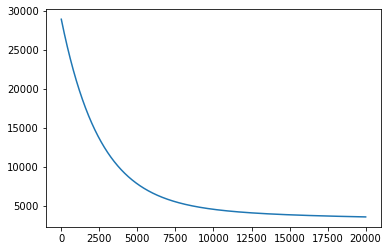

In [21]:
plt.plot(losses)
plt.show()

In [22]:
# W, b 확인
W, b

(array([  56.62073009,  -25.55073875,  221.62890796,  159.82395944,
          31.04585209,   10.521168  , -124.85489532,  120.1648051 ,
         187.71887495,  123.5616653 ]),
 149.90273206113207)

## (10) test 데이터에 대한 성능 확인하기

In [23]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3248.5263509939123

## (11) 정답 데이터와 예측한 데이터 시각화하기

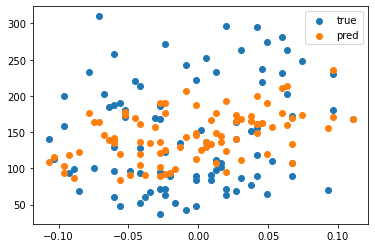

In [24]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

# 프로젝트 2 : 맑은 날 자전거 타는 사람 머릿수 추측하기

- Kaggle 데이터넷 가져오기
- 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제

    → 시간, 요일, 계절 모두 영향을 미칠 것

- 직접 손실함수와 기울기를 계산하지 않고 `sklearn`의 LinearRegression 모델 활용할 것(순서는 위와 그대로)

## (1) 데이터 가져오기

In [25]:
train = pd.read_csv("~/aiffel/e/rsc/train.csv")
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
test = pd.read_csv('~/aiffel/e/rsc/test.csv')
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [27]:
print(type(train['datetime']))
train['datetime'] = pd.to_datetime(train['datetime'])
print(type(train['datetime'][0]))

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [28]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

In [29]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.3, 0.3, '한글')

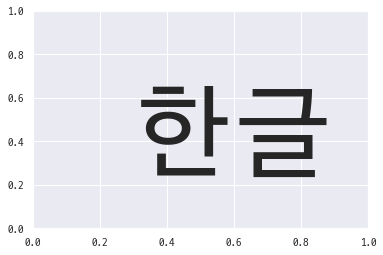

In [31]:
#. 한글 출력
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location='/home/aiffel/.local/share/fonts/D2CodingBold-Ver1.3.2-20180524-ligature.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
plt.rc('font',family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

## 아래 countplot은 그래프가 정상적으로 보이지 않는 에러가 나타나 barplot으로 대체

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

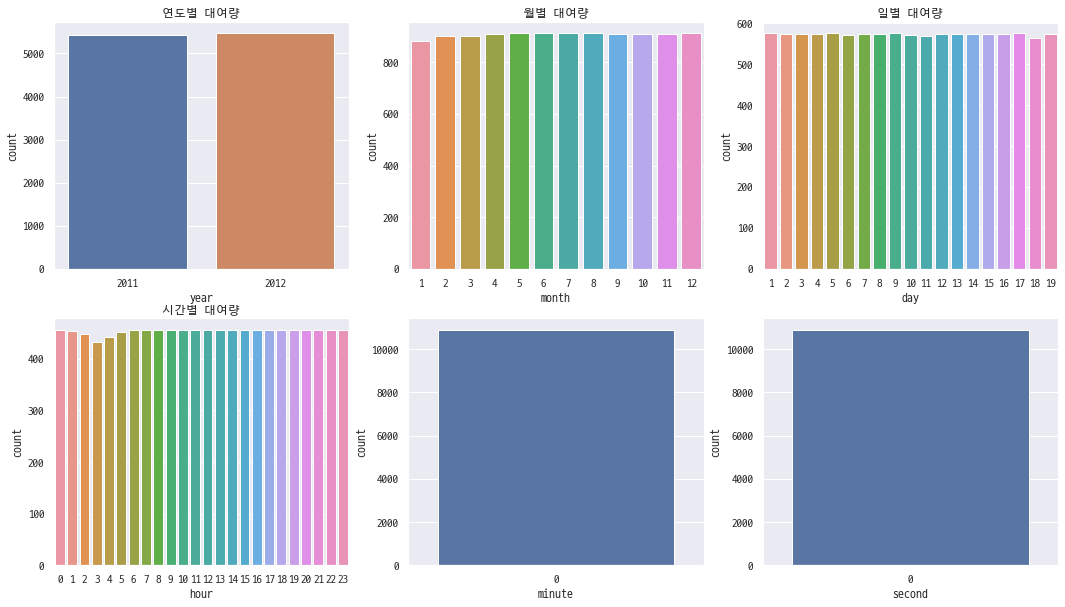

In [34]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,10)

sns.countplot(data=train,x="year",ax=ax1)
sns.countplot(data=train,x="month",ax=ax2)
sns.countplot(data=train,x="day",ax=ax3)
sns.countplot(data=train,x="hour",ax=ax4)
sns.countplot(data=train,x="minute",ax=ax5)
sns.countplot(data=train,x="second",ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(xlabel='month', title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour',title="시간별 대여량")

<AxesSubplot:xlabel='second', ylabel='count'>

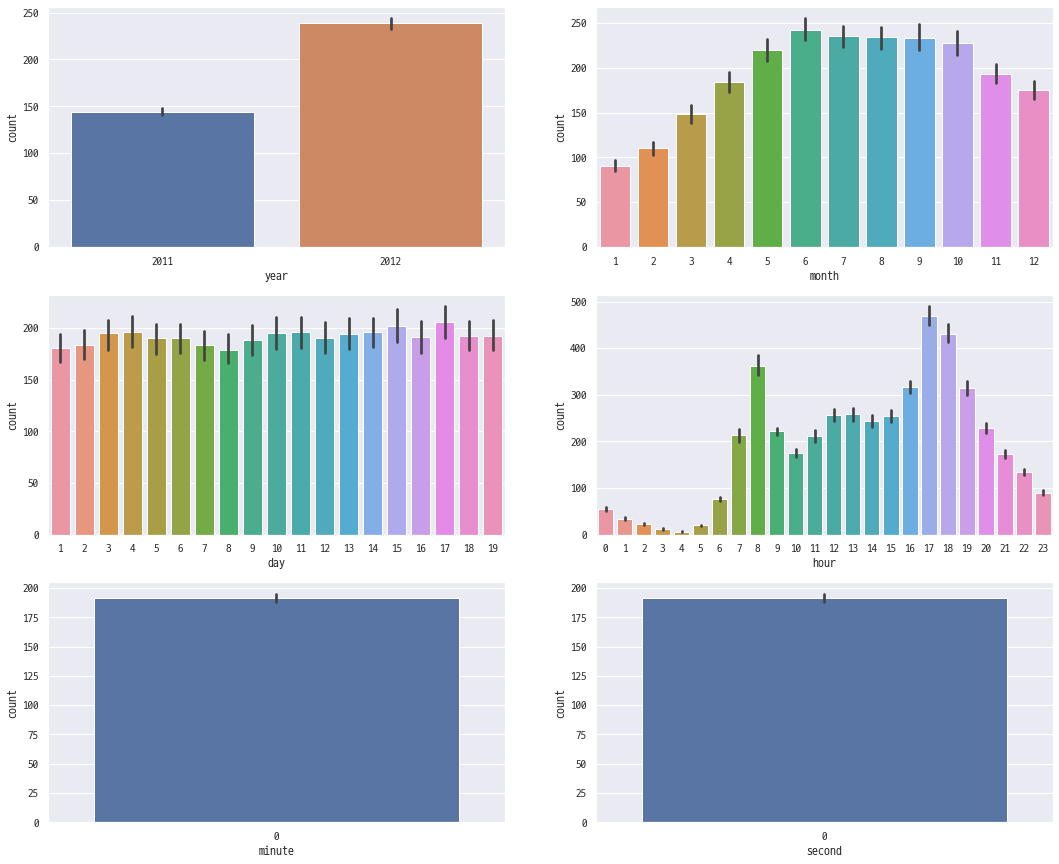

In [39]:
fig=plt.figure(figsize=[18,15])

ax1=fig.add_subplot(3,2,1)
sns.barplot(data=train,x="year",y="count")
ax2=fig.add_subplot(3,2,2)
sns.barplot(data=train,x="month",y="count")
ax3=fig.add_subplot(3,2,3)
sns.barplot(data=train,x="day",y="count")
ax4=fig.add_subplot(3,2,4)
sns.barplot(data=train,x="hour",y="count")
ax5=fig.add_subplot(3,2,5)
sns.barplot(data=train,x="minute",y="count")
ax6=fig.add_subplot(3,2,6)
sns.barplot(data=train,x="second",y="count")

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

## (5) LinearRegression 모델 학습

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기